In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np


C:\Users\kashi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("C:/Users/kashi/OneDrive/Desktop/waste.csv")
df.dtypes
df.head()

,Service Request Number,SR Type,Agency,Created Date,SR Status,Due Date,Close Date,Street Address,Neighborhood,Latitude,Longitude,geo_sw_quad
0,17-00007827,SW-Cleaning,Solid Waste ...,1/5/2017,Closed,2/4/2017,1/24/2017,3539S ADDISON ST,NaN,NaN,NaN,NaN
1,17-00007830,SW-Cleaning,Solid Waste ...,1/5/2017,Closed,2/4/2017,1/13/2017,2573W LAFAYETTE AVE,NaN,NaN,NaN,NaN
2,17-00007831,SW-Boarding,Solid Waste ...,1/5/2017,Closed,1/12/2017,1/13/2017,2573W LAFAYETTE AVE,NaN,NaN,NaN,NaN
3,17-00047167,SW-Cleaning,Solid Waste ...,1/24/2017,Closed,2/23/2017,1/30/2017,1115N BRADFORD ST,NaN,NaN,NaN,NaN
4,17-00010780,SW-Cleaning,Solid Waste ...,1/6/2017,Closed,2/5/2017,1/25/2017,1602N BRADFORD ST,NaN,NaN,NaN,NaN


In [3]:
df['Created Date'] = pd.to_datetime(df['Created Date'], format = "%m/%d/%Y")
df['Close Date'] = pd.to_datetime(df['Close Date'], format = "%m/%d/%Y")
df['Due Date'] = pd.to_datetime(df['Due Date'], format = "%m/%d/%Y")
df.head()

df = df.loc[df['Created Date'].between("2017-01-01", "2019-12-31")]
df['Created Date'].min()

df['year'] = pd.DatetimeIndex(df['Created Date']).year
df.head()

,Service Request Number,SR Type,Agency,Created Date,SR Status,Due Date,Close Date,Street Address,Neighborhood,Latitude,Longitude,geo_sw_quad,year
0,17-00007827,SW-Cleaning,Solid Waste ...,2017-01-05,Closed,2017-02-04,2017-01-24,3539S ADDISON ST,NaN,NaN,NaN,NaN,2017
1,17-00007830,SW-Cleaning,Solid Waste ...,2017-01-05,Closed,2017-02-04,2017-01-13,2573W LAFAYETTE AVE,NaN,NaN,NaN,NaN,2017
2,17-00007831,SW-Boarding,Solid Waste ...,2017-01-05,Closed,2017-01-12,2017-01-13,2573W LAFAYETTE AVE,NaN,NaN,NaN,NaN,2017
3,17-00047167,SW-Cleaning,Solid Waste ...,2017-01-24,Closed,2017-02-23,2017-01-30,1115N BRADFORD ST,NaN,NaN,NaN,NaN,2017
4,17-00010780,SW-Cleaning,Solid Waste ...,2017-01-06,Closed,2017-02-05,2017-01-25,1602N BRADFORD ST,NaN,NaN,NaN,NaN,2017


In [4]:
df['past_due'] =  (df['Close Date'] - df['Due Date']).dt.days
df.groupby(['Neighborhood', 'geo_sw_quad'])['past_due'].mean().sort_values(ascending = False).head(10)

df.groupby(['SR Type'])['past_due'].mean()

SR Type
SW-Boarding                  -0.470303
SW-Cleaning                  18.648572
SW-Dirty Alley               18.483518
SW-Dirty Alley Proactive      0.840384
SW-Dirty Street               2.789074
SW-Dirty Street Proactive    -6.740791
SW-HGW                       39.846550
Name: past_due, dtype: float64

In [5]:
df = df[df['SR Status'].str.contains('Duplicate')==False]
df = df[df['SR Status'].str.contains('Transfer')==False]
df = df[df['SR Type'].str.contains('Proactive')==False]
df = df.rename(columns={"SR Type": "SR_Type"})

df_2017 = df.loc[df['Created Date'].between("2017-01-01", "2017-12-31")]
df_2018 = df.loc[df['Created Date'].between("2018-01-01", "2018-12-31")]
df_2019 = df.loc[df['Created Date'].between("2019-01-01", "2019-12-31")]
# Using groupby() and count()

print(df.groupby(['SR_Type', 'year'])['SR Status'].count())

SR_Type          year
SW-Boarding      2017     7445
                 2018     9025
                 2019     8007
SW-Cleaning      2017    10715
                 2018    16047
                 2019    10395
SW-Dirty Alley   2017    24065
                 2018    25936
                 2019    22117
SW-Dirty Street  2017    15212
                 2018    15700
                 2019    13409
SW-HGW           2017    23488
                 2018    20327
                 2019    19157
Name: SR Status, dtype: int64


In [6]:
services = df.groupby(['SR_Type', 'year'])['SR Status'].count()
services = services.sort_values()
services

SR_Type          year
SW-Boarding      2017     7445
                 2019     8007
                 2018     9025
SW-Cleaning      2019    10395
                 2017    10715
SW-Dirty Street  2019    13409
                 2017    15212
                 2018    15700
SW-Cleaning      2018    16047
SW-HGW           2019    19157
                 2018    20327
SW-Dirty Alley   2019    22117
SW-HGW           2017    23488
SW-Dirty Alley   2017    24065
                 2018    25936
Name: SR Status, dtype: int64

In [7]:
import matplotlib.pyplot as plt


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SW-Boarding'),
  Text(1, 0, 'SW-Cleaning'),
  Text(2, 0, 'SW-Dirty Alley'),
  Text(3, 0, 'SW-Dirty Street'),
  Text(4, 0, 'SW-HGW')])

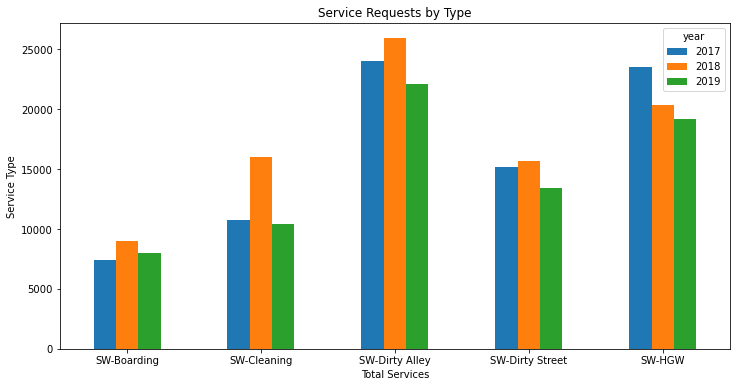

In [8]:
df.groupby('SR_Type').year.value_counts().unstack().plot.bar(figsize=(12, 6), title='Service Requests by Type',
                                                             xlabel='Total Services', ylabel='Service Type')
plt.xticks(rotation='horizontal')

In [9]:
df.isna().sum()
df = df[df['Close Date'].notna()]
df = df[df['Due Date'].notna()]
df.isna().sum()

Service Request Number       0
SR_Type                      0
Agency                       0
Created Date                 0
SR Status                    0
Due Date                     0
Close Date                   0
Street Address               4
Neighborhood              2544
Latitude                  2212
Longitude                 2212
geo_sw_quad               2515
year                         0
past_due                     0
dtype: int64

In [10]:
df['ontime'] = np.where(df['Close Date'] <= df['Due Date'], 1, 0)
df.head()

df = df.sort_values(by='Created Date')
df.head()

,Service Request Number,SR_Type,Agency,Created Date,SR Status,Due Date,Close Date,Street Address,Neighborhood,Latitude,Longitude,geo_sw_quad,year,past_due,ontime
433409,17-00000389,SW-Dirty Alley,Solid Waste ...,2017-01-01,Closed,2017-01-08,2017-01-03,"3000 WOLCOTT AVE, Baltimore City, 21216",Concerned Citizens Of Forest Park,39.32,-76.68,NORTHWEST,2017,-5.0,1
168701,17-00000161,SW-Dirty Street,Solid Waste ...,2017-01-01,Closed,2017-01-08,2017-01-03,"1032 E 36TH ST, Baltimore City, 21218",Ednor Gardens-Lakeside,39.33,-76.60,NORTHEAST,2017,-5.0,1
208781,17-00000404,SW-Dirty Street,Solid Waste ...,2017-01-01,Closed,2017-01-08,2017-01-03,"YORK RD & WOODBOURNE AVE, BALTIMORE",Mid-Govans,39.36,-76.61,NORTHWEST,2017,-5.0,1
65957,17-00000230,SW-Dirty Alley,Solid Waste ...,2017-01-01,Closed,2017-01-08,2017-01-03,"2700 ORLEANS ST, Baltimore City, 21224",McElderry Park,39.30,-76.58,SOUTHEAST,2017,-5.0,1
221788,17-00000405,SW-Dirty Street,Solid Waste ...,2017-01-01,Closed,2017-01-08,2017-01-03,"SAINT PAUL ST & E UNIVERSITY PKWY, BALTIMORE",Guilford,39.33,-76.62,NORTHWEST,2017,-5.0,1


<AxesSubplot:title={'center':'On-Time Percentage (90-day Rolling Average)'}, xlabel='Date', ylabel='Percent'>

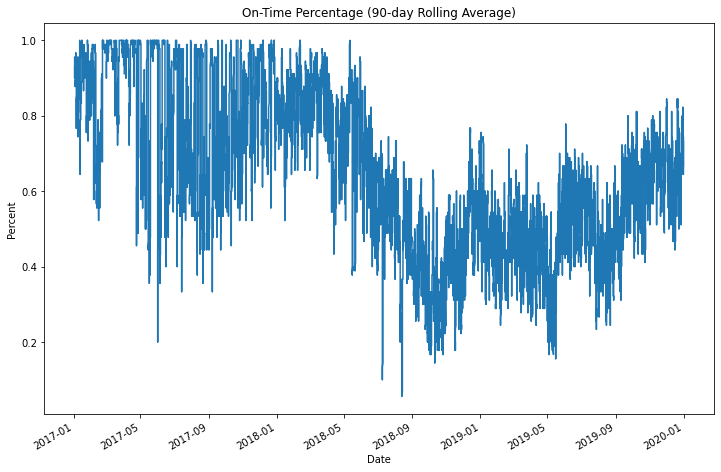

In [11]:
df['MA'] = df['ontime'].rolling(window=90).mean()
df.head(91)
df.plot('Created Date', 'MA',figsize=(12, 8), title = "On-Time Percentage (90-day Rolling Average)", ylabel = "Percent",
       xlabel = "Date", legend = False)

In [50]:
df_2019.groupby(['SR_Type'])['past_due'].mean()
print(df_2019['MA'].mean())
df_2018 = df.loc[df['Created Date'].between("2018-01-01", "2018-12-31")]
print(df_2018['MA'].mean())

0.499111159831367
0.617174089068826


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SW-Boarding'),
  Text(1, 0, 'SW-Cleaning'),
  Text(2, 0, 'SW-Dirty Alley'),
  Text(3, 0, 'SW-Dirty Street'),
  Text(4, 0, 'SW-HGW')])

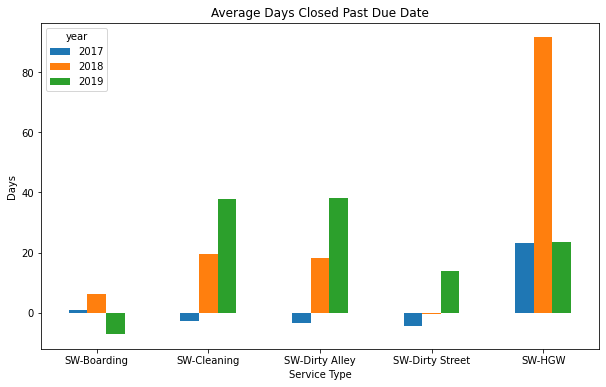

In [13]:

df_pivot = pd.pivot_table(
    df,
    values="past_due",
    index="SR_Type",
    columns="year",
    aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 6)
ax.set_xlabel("Service Type")
ax.set_ylabel("Days")
plt.title("Average Days Closed Past Due Date")
plt.xticks(rotation='horizontal')

In [36]:
df_2019 = df.loc[df['Created Date'].between("2019-01-01", "2019-12-31")]
df_2019.head()

print(1- df_2019['ontime'].mean())

0.5008427081763247


In [35]:
df_pre2019 = df.loc[df['Created Date'].between("2017-01-01", "2018-12-31")]
print(1 - df_pre2019['ontime'].mean())

0.3187189914064248


In [53]:
import seaborn as sns
data = {'Time': ['2017 to 2018', '2019'], 'Percent': [0.3187, 0.5008]}
plot_df = pd.DataFrame(data)


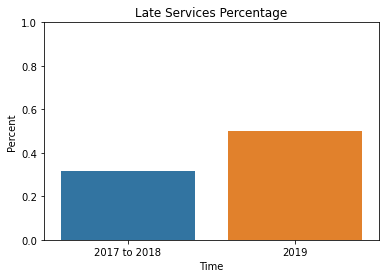

In [54]:
fig, ax = plt.subplots()
sns.barplot(data = plot_df, x = 'Time', y = 'Percent', ax=ax).set(title='Late Services Percentage')
ax.set_ylim(0,1)
plt.show()

SR_Type
SW-Boarding        0.605866
SW-Cleaning        0.622257
SW-Dirty Alley     0.795244
SW-Dirty Street    0.901915
SW-HGW             0.400732
Name: ontime, dtype: float64


(0.0, 1.0)

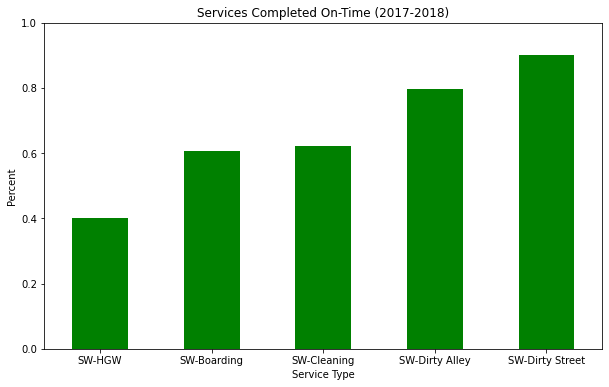

In [18]:
print(df_pre2019.groupby(['SR_Type'])['ontime'].mean())
service_pre2019 = df_pre2019.groupby(['SR_Type'])['ontime'].mean().sort_values()
service_pre2019.plot(kind='bar', title='Services Completed On-Time (2017-2018)',
               ylabel='Percent', xlabel='Service Type', figsize=(10, 6), color = "green")
plt.xticks(rotation='horizontal')
plt.ylim((0,1))

SR_Type
SW-Boarding        0.734211
SW-Cleaning        0.345841
SW-Dirty Alley     0.429082
SW-Dirty Street    0.635842
SW-HGW             0.469189
Name: ontime, dtype: float64


(0.0, 1.0)

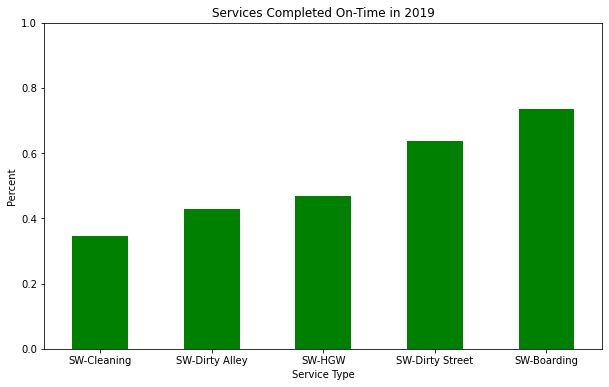

In [19]:
print(df_2019.groupby(['SR_Type'])['ontime'].mean())
service_2019 = df_2019.groupby(['SR_Type'])['ontime'].mean().sort_values()
service_2019.plot(kind='bar', title='Services Completed On-Time in 2019',
               ylabel='Percent', xlabel='Service Type', figsize=(10, 6), color = "green")
plt.xticks(rotation='horizontal')
plt.ylim((0,1))

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SW-Boarding'),
  Text(1, 0, 'SW-Cleaning'),
  Text(2, 0, 'SW-Dirty Alley'),
  Text(3, 0, 'SW-Dirty Street'),
  Text(4, 0, 'SW-HGW')])

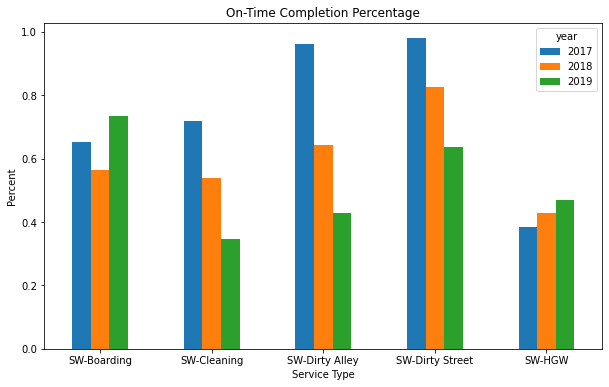

In [20]:
df_pivot = pd.pivot_table(
    df,
    values="ontime",
    index="SR_Type",
    columns="year",
    aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 6)
# Change the axes labels
ax.set_xlabel("Service Type")
ax.set_ylabel("Percent")
plt.title("On-Time Completion Percentage")
plt.xticks(rotation='horizontal')

In [21]:
from statsmodels.stats.proportion import proportions_ztest
count_2019 = df_2019['ontime'].sum()
count_pre2019 = df_pre2019['ontime'].sum()
nobs_2019 = df_2019['ontime'].count()
nobs_pre2019 = df_pre2019['ontime'].count()
count = np.array([count_2019, count_pre2019])
nobs = np.array([nobs_2019, nobs_pre2019])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))


proportions_ztest(count, nobs)

0.000


(-83.40795472605156, 0.0)

In [56]:
print(df.groupby(['Neighborhood', 'SR_Type', 'geo_sw_quad'])['ontime'].count().sort_values(ascending = False).head(10))
print(df.groupby(['Neighborhood', 'geo_sw_quad'])['ontime'].mean().sort_values(ascending = False).head(100))

Neighborhood                 SR_Type         geo_sw_quad
Broadway East                SW-HGW          SOUTHEAST      5518
McElderry Park               SW-Dirty Alley  SOUTHEAST      3369
Central Park Heights         SW-HGW          NORTHWEST      3160
Broadway East                SW-Cleaning     SOUTHEAST      2760
Patterson Park Neighborhood  SW-Dirty Alley  SOUTHEAST      2630
Belair-Edison                SW-Dirty Alley  NORTHEAST      2628
Ellwood Park/Monument        SW-Dirty Alley  SOUTHEAST      2600
Sandtown-Winchester          SW-HGW          SOUTHWEST      2209
Oliver                       SW-HGW          SOUTHEAST      2195
Harlem Park                  SW-HGW          SOUTHWEST      2122
Name: ontime, dtype: int64
Neighborhood                               geo_sw_quad
Jonestown,Penn-Fallsway                    SOUTHEAST      1.000000
Orangeville Industrial Area,Belair-Edison  SOUTHEAST      1.000000
Hunting Ridge,West Hills                   SOUTHWEST      1.000000
Bolton Hil

In [23]:
print(df.groupby(['Street Address',  'geo_sw_quad'])['ontime'].count().sort_values(ascending = False).head(10))

Street Address                               geo_sw_quad
5225 YORK RD, Baltimore City, 21212          NORTHEAST      1120
3939 REISTERSTOWN RD, Baltimore City, 21215  NORTHWEST       817
417 E FAYETTE ST, Baltimore City, 21202      CENTRAL         436
3411 BANK ST, Baltimore City, 21224          SOUTHEAST       279
417 W FAYETTE ST, Baltimore City, 21201      CENTRAL         139
1901 HARMAN AVE, Baltimore City              SOUTHWEST        99
600 N CURLEY ST, Baltimore City, 21205       SOUTHEAST        98
3328 NOBLE ST, Baltimore City, 21224         SOUTHEAST        97
530 N KENWOOD AVE, Baltimore City, 21205     SOUTHEAST        97
401 S VINCENT ST, Baltimore City, 21223      SOUTHWEST        78
Name: ontime, dtype: int64


In [24]:
df_2019.describe()
df_2019_board = df_2019.loc[df_2019['SR_Type']== 'SW-Boarding']
df_2019_clean = df_2019.loc[df_2019['SR_Type']== 'SW-Cleaning']
df_2019_da = df_2019.loc[df_2019['SR_Type']== 'SW-Dirty Alley']
df_2019_ds = df_2019.loc[df_2019['SR_Type']== 'SW-Dirty Street']
df_2019_hgw = df_2019.loc[df_2019['SR_Type']== 'SW-HGW']

board = df_2019_board.sample(replace = True, n = 383)
clean = df_2019_clean.sample(replace = True, n = 383)
da = df_2019_da.sample(replace = True, n = 383)
ds = df_2019_ds.sample(replace = True, n = 383)
hgw = df_2019_hgw.sample(replace = True, n = 383)

board_ct = board['ontime'].sum()
clean_ct = clean['ontime'].sum()
da_ct = da['ontime'].sum()
ds_ct = ds['ontime'].sum()
hgw_ct = hgw['ontime'].sum()

board_prop = board['ontime'].mean()
clean_prop = clean['ontime'].mean()
da_prop = da['ontime'].mean()
ds_prop = ds['ontime'].mean()
hgw_prop = hgw['ontime'].mean()

x = np.array([board_ct, clean_ct, da_ct, ds_ct, hgw_ct])
nob = np.array([383, 383,383, 383, 383])


print(board['ontime'].sum())
print(clean['ontime'].sum())
print(da['ontime'].sum())
print(ds['ontime'].sum())
print(hgw['ontime'].sum())


285
129
175
247
188


In [25]:

p1 = np.array([board_prop, clean_prop, da_prop, ds_prop, hgw_prop])

from scipy.stats import chisquare
total = 99 + 36 + 48 + 9
chi_square, p = chisquare(x, f_exp=p1)
print('chi test statistic of this experiment is: ', chi_square)
print('P value of this experiment is: ', p)

chi test statistic of this experiment is:  390146.6736292428
P value of this experiment is:  0.0


In [26]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_2019.ontime,df_2019.SR_Type)
contingency_table

c, p, dof, expected = chi2_contingency(contingency_table) 
# Print the p-value
print(p)

0.0
